# Corrélation Client-Sex-Categ
## Quali/Quali

In [1]:
# Importation des librairies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import datetime

from datetime import datetime

In [2]:
# Déclaration d'une fonction
def analyseDataFrame(df):
    """Fonction qui prend en arguments un dataframe pour analyse."""

    name =[x for x in globals() if globals()[x] is df][0]
    print("La dimension de DataFrame « " + name  +" » : " + str(df.shape) + " (lignes, colonnes)\n")
    display(df.info())
    display(df.head())
    display(df.describe().T)
    display(df.nunique())

In [3]:
# Importation du dataFrame 'df_enrichi'
df_enrichi = pd.read_csv("df_enrichi.csv", index_col="date_2", parse_dates= True)

# Vérifier que la première colonne est une idex
df_enrichi.index = pd.to_datetime(df_enrichi.index)

# Trier sur la colonne date
df_enrichi = df_enrichi.sort_index()

# Visualisualisation de df_enrichi
analyseDataFrame(df_enrichi)

La dimension de DataFrame « df_enrichi » : (679111, 11) (lignes, colonnes)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 679111 entries, 2021-03-01 00:01:07.843138 to 2023-02-28 23:58:30.792755
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  679111 non-null  int64  
 1   client_id   679111 non-null  object 
 2   sex         679111 non-null  object 
 3   birth       679111 non-null  float64
 4   age         679111 non-null  float64
 5   id_prod     679111 non-null  object 
 6   date        679111 non-null  object 
 7   session_id  679111 non-null  object 
 8   price       679111 non-null  float64
 9   categ       679111 non-null  float64
 10  _merge      679111 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 62.2+ MB


None

,Unnamed: 0,client_id,sex,birth,age,id_prod,date,session_id,price,categ,_merge
date_2,,,,,,,,,,,
2021-03-01 00:01:07.843138,129502,c_329,f,1967.0,55.0,0_1259,2021-03-01 00:01:07.843138,s_1,11.99,0.0,both
2021-03-01 00:02:26.047414,17306,c_664,m,1960.0,62.0,0_1390,2021-03-01 00:02:26.047414,s_2,19.37,0.0,both
2021-03-01 00:02:38.311413,146527,c_580,m,1988.0,34.0,0_1352,2021-03-01 00:02:38.311413,s_3,4.50,0.0,both
2021-03-01 00:04:54.559692,506717,c_7912,f,1989.0,33.0,0_1458,2021-03-01 00:04:54.559692,s_4,6.55,0.0,both
2021-03-01 00:05:18.801198,218220,c_2033,f,1956.0,66.0,0_1358,2021-03-01 00:05:18.801198,s_5,16.49,0.0,both


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,679111.0,339599.602812,196104.276737,0.00,169777.50,339555.00,509332.50,679331.0
birth,679111.0,1977.811149,13.575361,1929.00,1970.00,1980.00,1987.00,2004.0
age,679111.0,44.188851,13.575361,18.00,35.00,42.00,52.00,93.0
price,679111.0,17.454773,18.328998,0.62,8.87,13.99,18.99,300.0
categ,679111.0,0.441953,0.595042,0.00,0.00,0.00,1.00,2.0


Unnamed: 0    679111
client_id       8600
sex                2
birth             76
age               76
id_prod         3265
date          679111
session_id    342275
price           1442
categ              3
_merge             1
dtype: int64

In [4]:
# Préparation du df
df_QL_QL_SexCateg = df_enrichi[["sex", "categ"]]
                                
df_QL_QL_SexCateg.head()

,sex,categ
date_2,,
2021-03-01 00:01:07.843138,f,0.0
2021-03-01 00:02:26.047414,m,0.0
2021-03-01 00:02:38.311413,m,0.0
2021-03-01 00:04:54.559692,f,0.0
2021-03-01 00:05:18.801198,f,0.0


In [5]:
df_QL_QL_SexCateg.dtypes

sex       object
categ    float64
dtype: object

In [6]:
# Calcul du nombre de clients par genre
df_QL_QL_SexCateg["sex"].value_counts()

m    340826
f    338285
Name: sex, dtype: int64

In [7]:
# Calcul du nombre de livres par catégorie
df_QL_QL_SexCateg["categ"].value_counts()

0.0    415459
1.0    227169
2.0     36483
Name: categ, dtype: int64

In [8]:
type(df_QL_QL_SexCateg["sex"])

pandas.core.series.Series

In [9]:
type(df_QL_QL_SexCateg["categ"])

pandas.core.series.Series

In [10]:
f_Cat0 = ((df_QL_QL_SexCateg["sex"]=="f")&(df_QL_QL_SexCateg["categ"]==0)).sum()
print("Nombre de femmes pour la catégorie 0:", f_Cat0)

f_Cat1 = ((df_QL_QL_SexCateg["sex"]=="f")&(df_QL_QL_SexCateg["categ"]==1)).sum()
print("Nombre de femmes pour la catégorie 1:", f_Cat1)

f_Cat2 = ((df_QL_QL_SexCateg["sex"]=="f")&(df_QL_QL_SexCateg["categ"]==2)).sum()
print("Nombre de femmes pour la catégorie 2:", f_Cat2)


Nombre de femmes pour la catégorie 0: 206103
Nombre de femmes pour la catégorie 1: 114899
Nombre de femmes pour la catégorie 2: 17283


In [11]:
m_Cat0 = ((df_QL_QL_SexCateg["sex"]=="m")&(df_QL_QL_SexCateg["categ"]==0)).sum()
print("Nombre d'hommes pour la catégorie 0:", m_Cat0)

m_Cat1 = ((df_QL_QL_SexCateg["sex"]=="m")&(df_QL_QL_SexCateg["categ"]==1)).sum()
print("Nombre d'hommes pour la catégorie 1:", m_Cat1)

m_Cat2 = ((df_QL_QL_SexCateg["sex"]=="m")&(df_QL_QL_SexCateg["categ"]==2)).sum()
print("Nombre d'hommes pour la catégorie 2:", m_Cat2)

Nombre d'hommes pour la catégorie 0: 209356
Nombre d'hommes pour la catégorie 1: 112270
Nombre d'hommes pour la catégorie 2: 19200


In [12]:
X = "sex"
Y = "categ"
cont = df_enrichi[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
print()
print("Tableau de contingence") 
display(cont)


Tableau de contingence


categ,0.0,1.0,2.0,Total
sex,,,,
f,206103,114899,17283,338285
m,209356,112270,19200,340826
Total,415459,227169,36483,679111


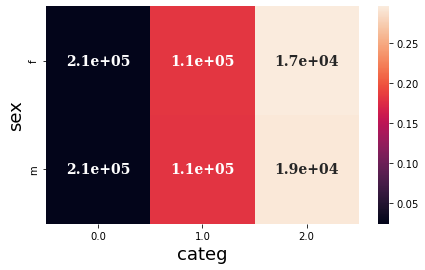

In [13]:
plt.figure(figsize = (7,4))

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df_enrichi)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n

plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)

sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1], annot_kws={
                                                                    'fontsize': 14,
                                                                    'fontweight': 'bold',
                                                                    'fontfamily': 'serif'
                                                                }
)
plt.show()

In [14]:
st_chi2, st_p_value, st_dof, st_exp = st.chi2_contingency(cont)
print("test statistique chi2   : ", st_chi2)
print("P_Value du test         : ", st_p_value)
print("Degrés de liberté       : ", st_dof)
x_name = "sex"
y_name = "categ"

# voir la partie : Par conséquent, nous devons comparer la valeur p obtenue avec une valeur alpha de 0,05.


alpha = 0.05
    
if st_p_value <= alpha:
    print(f"Probablement dependente : Probablement la variable « {x_name} » est liée à la variable « {y_name} »")
else:
    print(f"Probablement independente : Probablement la variable « {x_name} » n'est pas liée à la variable « {y_name} »")

test statistique chi2   :  147.11906816131497
P_Value du test         :  3.144522803251581e-29
Degrés de liberté       :  6
Probablement dependente : Probablement la variable « sex » est liée à la variable « categ »


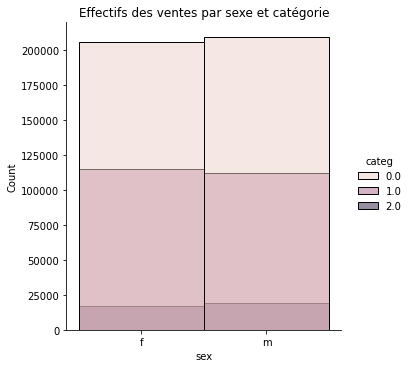

In [15]:
sns.displot(data=df_QL_QL_SexCateg, x="sex", hue="categ")
plt.title('Effectifs des ventes par sexe et catégorie')

plt.show()